In [43]:
import pandas as pd

In [44]:
data = df

In [45]:
#Loading Dataset into DataFrames
df = pd.read_csv(r"C:\Users\Acer\Desktop\Data Sci Assignments\EDA1\Cardiotocographic.csv")

In [46]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [47]:
df.tail()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
2121,140.0,0.000000,0.961268,0.007426,0.0,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.0,2.000000
2122,140.0,0.000775,0.000000,0.006979,0.0,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.0,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.0,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.0,1.990464
2124,140.0,0.000679,0.000000,0.006110,0.0,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.0,2.000000
2125,142.0,0.001616,-0.000188,0.008078,0.0,0.0,0.0,74.0,0.4,35.857183,5.0,42.0,0.0,1.000000


In [48]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Ensuring data type consistency
print("\nData types of each column:\n", df.dtypes)

# Detecting outliers using summary statistics
summary_statistics = df.describe()
print("\nSummary statistics for each column:\n", summary_statistics)


Missing values in each column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

Data types of each column:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Summary statistics for each column:
                 LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.00

In [49]:
# Calculate measures of central tendency and dispersion
summary = df.describe().transpose()
summary['median'] = df.median()
summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)

print("Statistical Summary:\n", summary)

# Highlight interesting findings
interesting_findings = []

# For example, let's find variables with a high standard deviation
high_std_dev = summary[summary['std'] > summary['std'].mean()]
if not high_std_dev.empty:
    interesting_findings.append(f"Variables with high standard deviation:\n{high_std_dev.index.tolist()}")


Statistical Summary:
            count        mean        std         min         25%         50%  \
LB        2105.0  133.343598  11.270154   51.842487  126.000000  133.000000   
AC        2106.0    0.003219   0.004391   -0.019284    0.000000    0.001634   
FM        2126.0    0.009894   0.067540   -0.480634    0.000000    0.000000   
UC        2126.0    0.004391   0.003340   -0.014925    0.001851    0.004484   
DL        2126.0    0.001895   0.003343   -0.015393    0.000000    0.000000   
DS        2105.0    0.000003   0.000142   -0.001353    0.000000    0.000000   
DP        2105.0    0.000175   0.000840   -0.005348    0.000000    0.000000   
ASTV      2126.0   46.995984  18.813973  -63.000000   32.000000   49.000000   
MSTV      2126.0    1.364378   1.173632   -6.600000    0.700000    1.200000   
ALTV      2126.0   10.285964  21.205041  -91.000000    0.000000    0.000000   
MLTV      2105.0    8.284887   7.772858  -50.700000    4.600000    7.400000   
Width     2105.0   70.429260  

In [50]:
# Print interesting findings
if interesting_findings:
    for finding in interesting_findings:
        print(finding)
else:
    print("No significant findings based on the statistical summary.")

Variables with high standard deviation:
['LB', 'ASTV', 'ALTV', 'MLTV', 'Width']


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

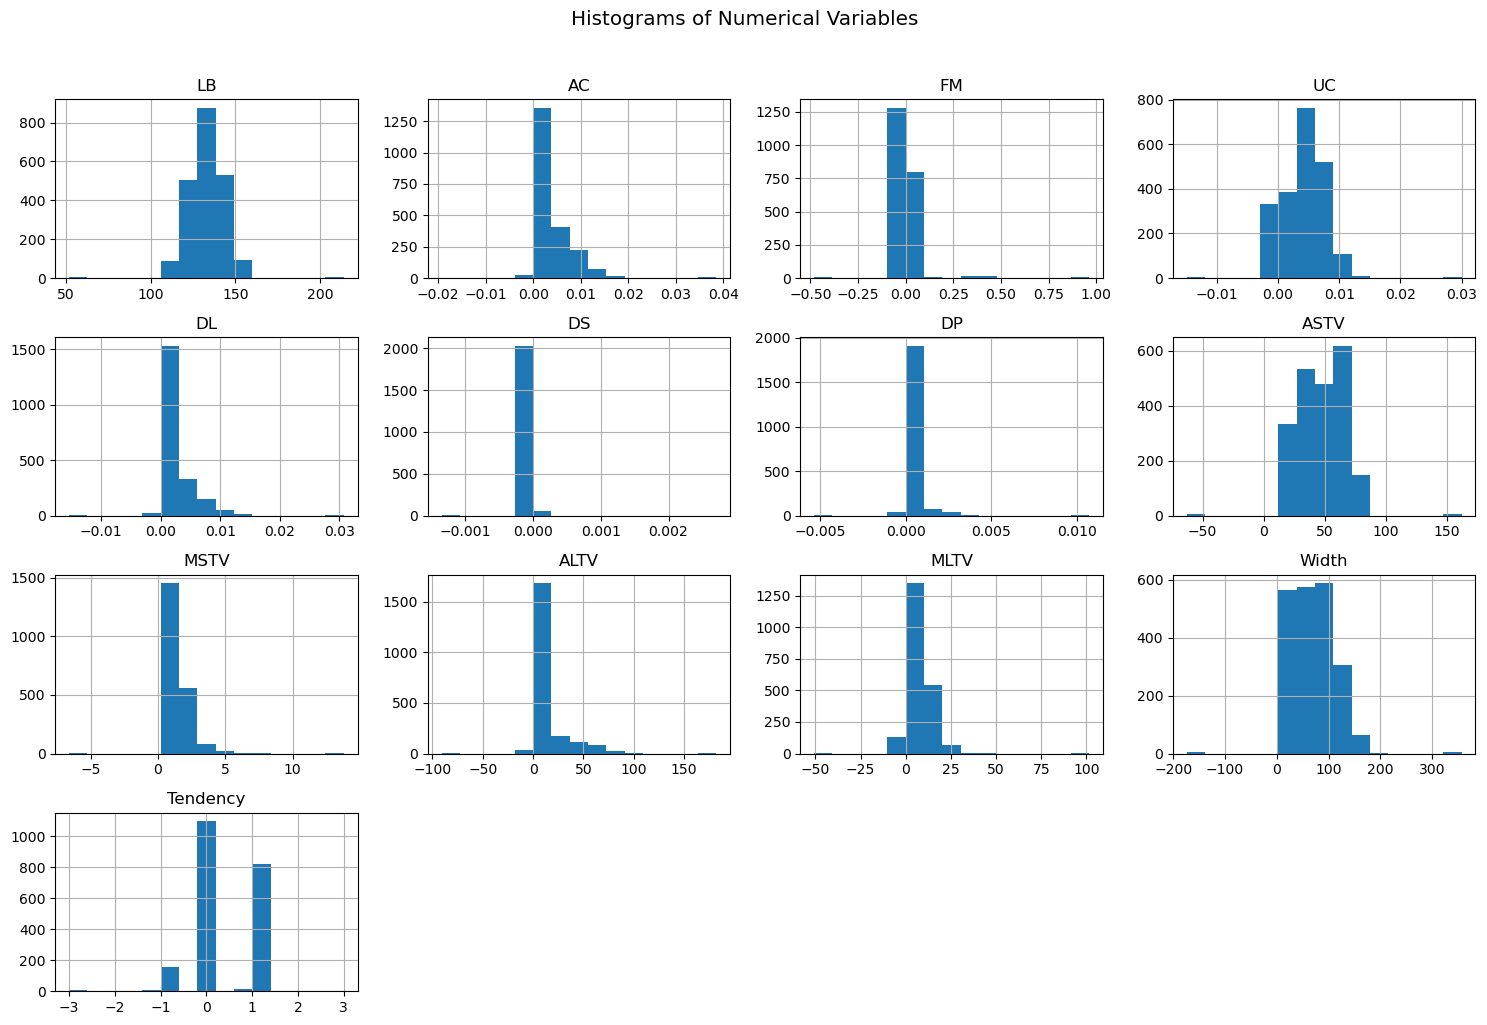

In [60]:
# Histograms
numerical_columns = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency']
df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables', x=0.5, y=1.02, ha='center', fontsize='x-large')
plt.tight_layout()
plt.show()

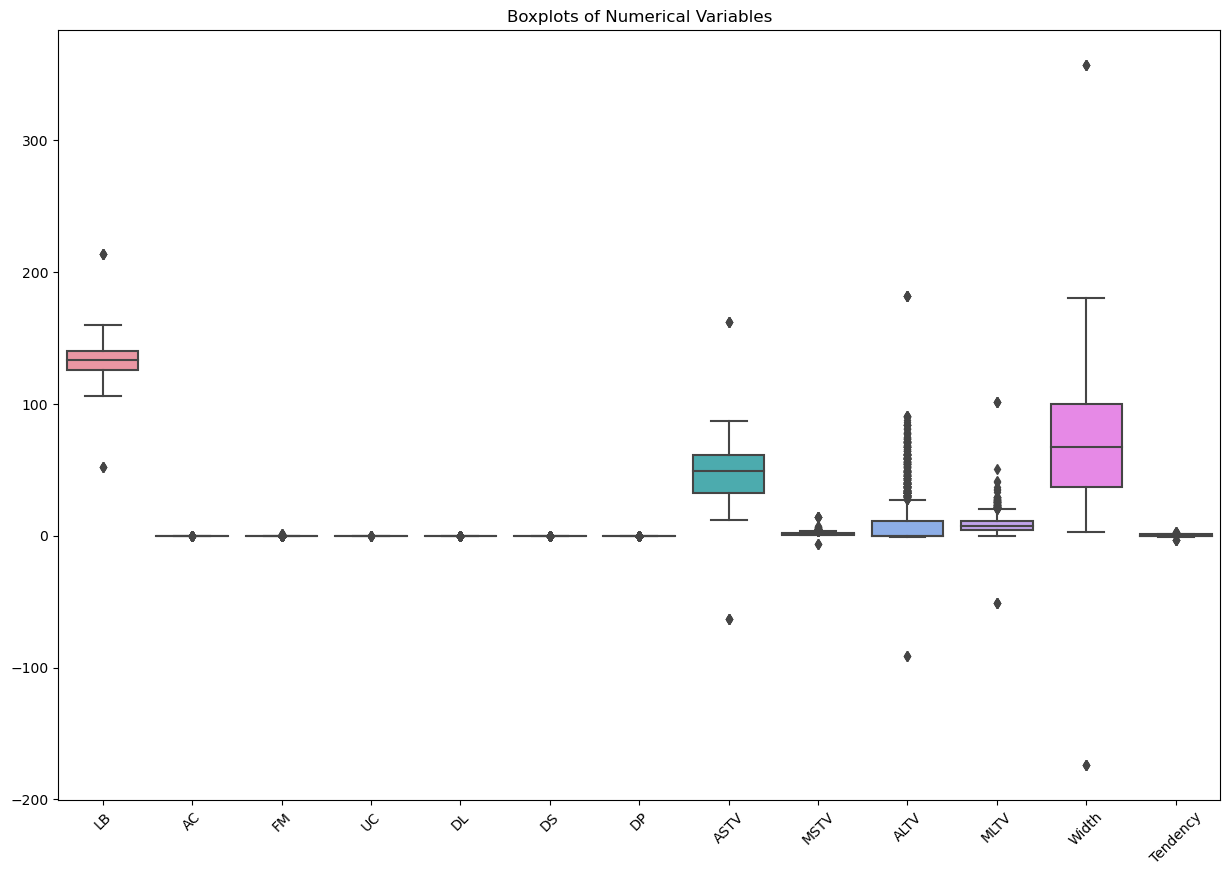

In [53]:
# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplots of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

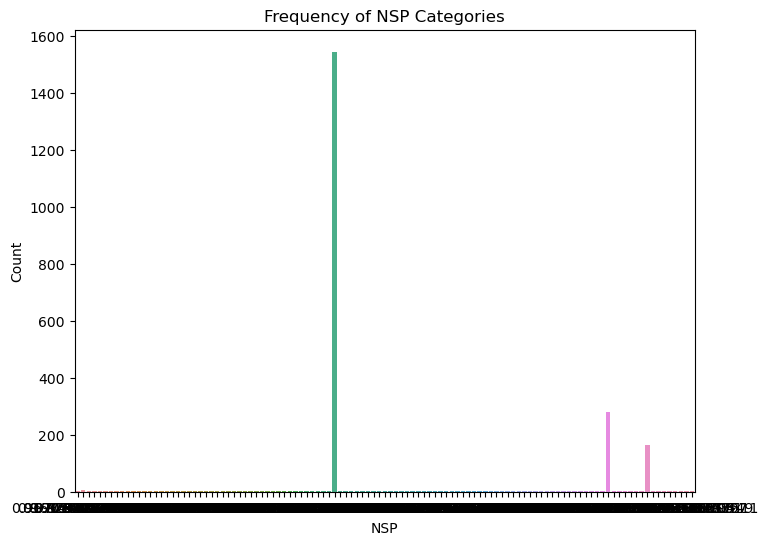

In [54]:
# Bar chart for categorical variable 'NSP'
plt.figure(figsize=(8, 6))
sns.countplot(x='NSP', data=df)
plt.title('Frequency of NSP Categories')
plt.xlabel('NSP')
plt.ylabel('Count')
plt.show()

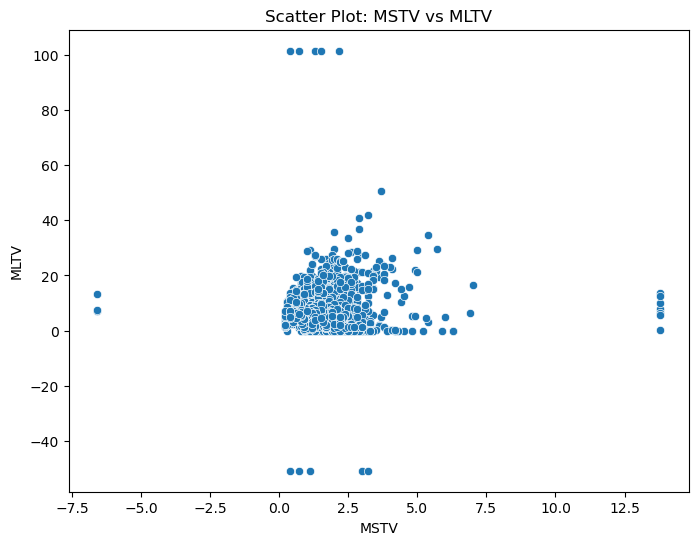

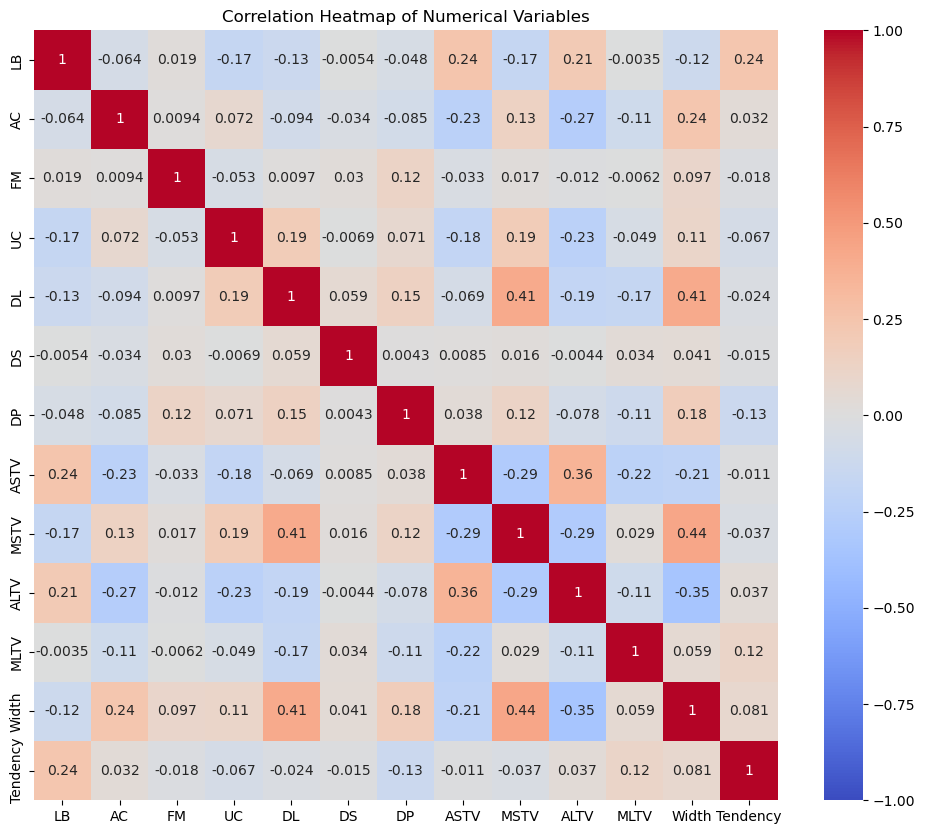

In [55]:
# Scatter plot between 'MSTV' and 'MLTV'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MSTV', y='MLTV', data=df)
plt.title('Scatter Plot: MSTV vs MLTV')
plt.xlabel('MSTV')
plt.ylabel('MLTV')
plt.show()

# Correlation heatmap for all numerical variables
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

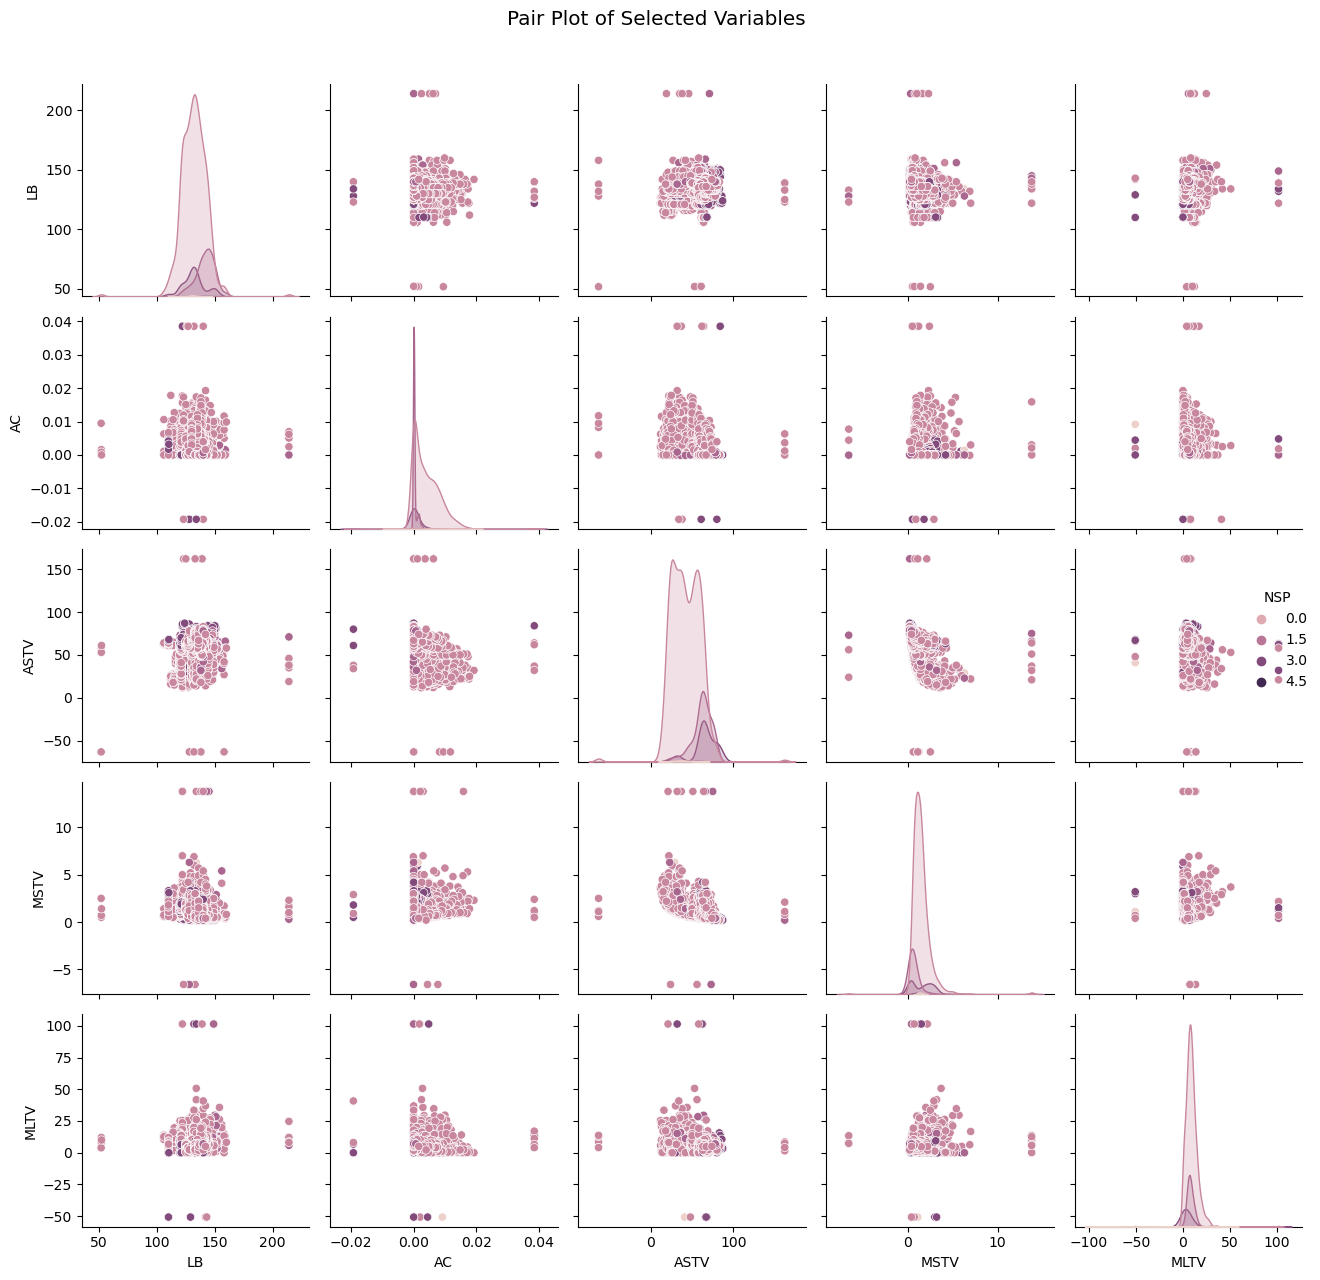

In [56]:
# Pair plot for selected variables
sns.pairplot(df[['LB', 'AC', 'ASTV', 'MSTV', 'MLTV', 'NSP']], hue='NSP', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables', x=0.5, y=1.02, ha='center', fontsize='x-large')
plt.tight_layout()
plt.show()

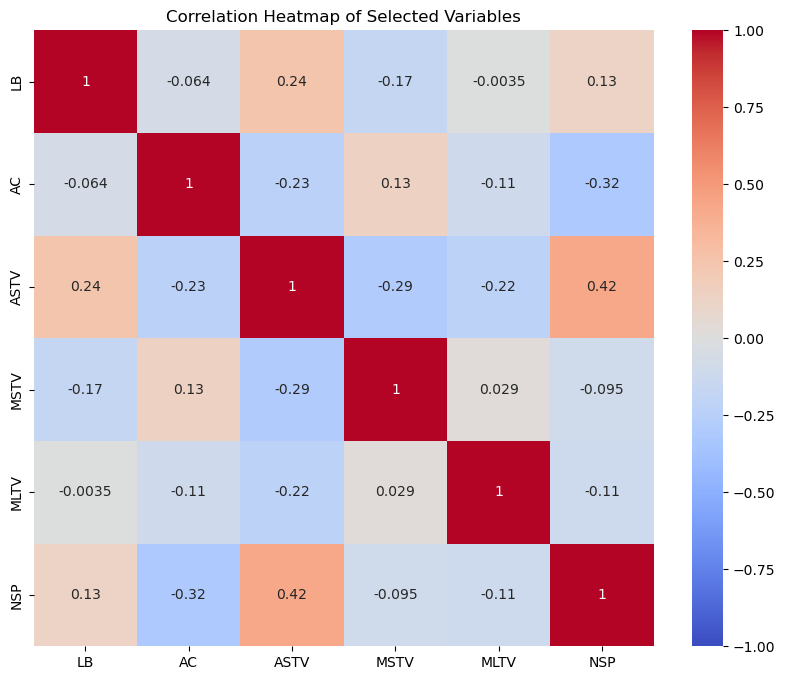

In [62]:

# Correlation heatmap for selected variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[['LB', 'AC', 'ASTV', 'MSTV', 'MLTV', 'NSP']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()


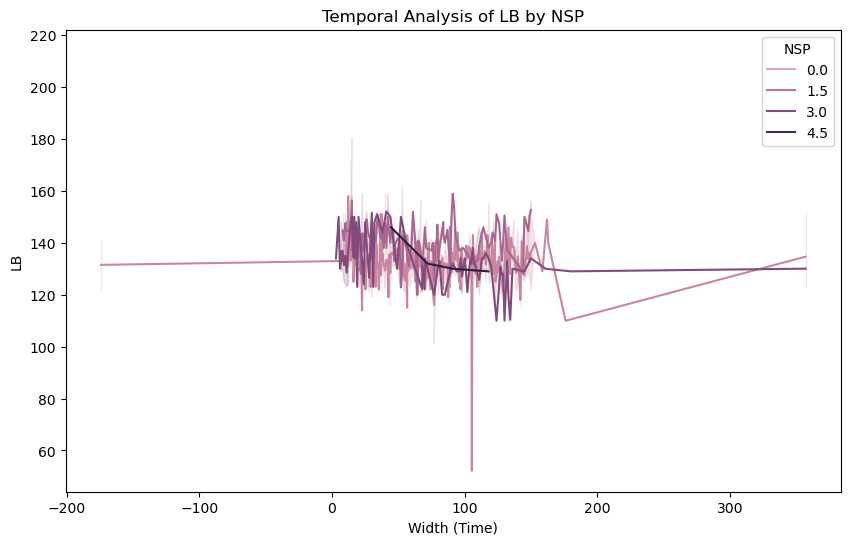

In [63]:
# Example of plotting time series data (if available)
# Assuming 'Width' represents a temporal component
plt.figure(figsize=(10, 6))
sns.lineplot(x='Width', y='LB', hue='NSP', data=df)
plt.title('Temporal Analysis of LB by NSP')
plt.xlabel('Width (Time)')
plt.ylabel('LB')
plt.show()


In [65]:
##Correlation Insights:

#Positive correlations observed between 'LB' (Baseline Fetal Heart Rate), 'AC' (Accelerations), and 'NSP' (Fetal State Class) suggest these variables are indicators of fetal well-being.
#Negative correlations, such as between certain variability metrics ('MSTV', 'MLTV') and adverse outcomes ('NSP'), highlight potential risk factors for fetal distress.

##Temporal Trends:

#Analysis of temporal data, represented by variables like 'Width', reveals fluctuations in fetal heart rate ('LB') over time, reflecting dynamic changes in fetal health states.
#Longitudinal insights indicate variations in fetal health indicators ('LB', 'AC') over time, potentially aiding in early detection of abnormalities.

##Clinical Implications:

#Understanding these patterns aids in developing targeted monitoring strategies for fetal health assessment.
#Insights into correlations and temporal trends empower healthcare providers to make timely interventions and improve perinatal outcomes.

In [66]:
#Summary
#The exploratory analysis of the dataset uncovered significant correlations between fetal monitoring variables and fetal state classes ('NSP'). These findings suggest that 'LB' and 'AC' are robust indicators of fetal well-being, while variability metrics ('MSTV', 'MLTV') may signal potential risks of fetal distress. Temporal analysis provided insights into the dynamic nature of fetal health indicators over time, enhancing the understanding of fetal health progression and enabling timely interventions.

#These insights have direct implications for clinical practice, guiding healthcare providers in developing targeted monitoring strategies and interventions to improve perinatal outcomes. Further research and advanced analytical approaches hold promise for refining predictive models and advancing fetal health assessment methodologies.